In [34]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(resnet_path, vgg_path, mobilenet_path,final_epoch_resnet18,final_epoch_vgg16,final_epoch_mobilenet):
    resnet_data = np.load(resnet_path)
    vgg_data = np.load(vgg_path)
    mobilenet_data = np.load(mobilenet_path)

    colors = ['blue', 'green', 'red']

    epochs_resnet = [i for i in range(1,final_epoch_resnet18+1)]
    epochs_vgg = [i for i in range(1,final_epoch_vgg16+1)]
    epochs_mobilenet = [i for i in range(1,final_epoch_mobilenet+1)]

    
    resnet_train_loss = resnet_data[:, 1][:final_epoch_resnet18]
    resnet_val_loss = resnet_data[:, 2][:final_epoch_resnet18]
    resnet_train_accuracy = resnet_data[:, 3][:final_epoch_resnet18]
    resnet_val_accuracy = resnet_data[:, 4][:final_epoch_resnet18]

    vgg_train_loss = vgg_data[:, 1][:final_epoch_vgg16]
    vgg_val_loss = vgg_data[:, 2][:final_epoch_vgg16]
    vgg_train_accuracy = vgg_data[:, 3][:final_epoch_vgg16]
    vgg_val_accuracy = vgg_data[:, 4][:final_epoch_vgg16]

    mobilenet_train_loss = mobilenet_data[:, 1][:final_epoch_mobilenet]
    mobilenet_val_loss = mobilenet_data[:, 2][:final_epoch_mobilenet]
    mobilenet_train_accuracy = mobilenet_data[:, 3][:final_epoch_mobilenet]
    mobilenet_val_accuracy = mobilenet_data[:, 4][:final_epoch_mobilenet]

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(epochs_resnet, resnet_train_loss, label='ResNet18 Train Loss',color=colors[0])
    plt.plot(epochs_resnet, resnet_val_loss, linestyle='--', label='ResNet18 Val Loss',color=colors[0])
    plt.plot(epochs_vgg, vgg_train_loss, label='VGG16 Train Loss',color=colors[1])
    plt.plot(epochs_vgg, vgg_val_loss, linestyle='--', label='VGG16 Val Loss',color=colors[1])
    plt.plot(epochs_mobilenet, mobilenet_train_loss, label='MobileNetV2 Train Loss',color=colors[2])
    plt.plot(epochs_mobilenet, mobilenet_val_loss, linestyle='--', label='MobileNetV2 Val Loss',color=colors[2])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Loss for All Models')
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs_resnet, resnet_train_accuracy, label='ResNet18 Train Accuracy',color=colors[0])
    plt.plot(epochs_resnet, resnet_val_accuracy, linestyle='--', label='ResNet18 Val Accuracy',color=colors[0])
    plt.plot(epochs_vgg, vgg_train_accuracy, label='VGG16 Train Accuracy',color=colors[1])
    plt.plot(epochs_vgg, vgg_val_accuracy, linestyle='--', label='VGG16 Val Accuracy',color=colors[1])
    plt.plot(epochs_mobilenet, mobilenet_train_accuracy, label='MobileNetV2 Train Accuracy',color=colors[2])
    plt.plot(epochs_mobilenet, mobilenet_val_accuracy, linestyle='--', label='MobileNetV2 Val Accuracy',color=colors[2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Train and Validation Accuracy for All Models')
    plt.legend()

    plt.show()


In [37]:
final_epoch_resnet18 = torch.load('/content/gdrive/MyDrive/AI Project/model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']
final_epoch_vgg16 = torch.load('/content/gdrive/MyDrive/AI Project/d1_vgg16_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']
final_epoch_mobilenet = torch.load('/content/gdrive/MyDrive/AI Project/d1_mnv2_model_checkpoint.pth',map_location=torch.device('cpu'))['epoch']

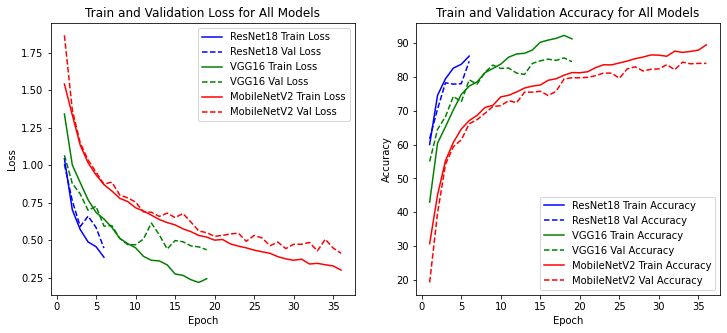

In [38]:
plot_metrics('/content/gdrive/MyDrive/AI Project/Dataset1_Resnet_metrics.npy', 
             '/content/gdrive/MyDrive/AI Project/Dataset1_VGG16_metrics.npy', 
             '/content/gdrive/MyDrive/AI Project/Dataset1_MNV2_metrics.npy',
             final_epoch_resnet18,
             final_epoch_vgg16,
             final_epoch_mobilenet
             )
